In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/content/heart_disease.csv')

# Display the first few rows and the summary of the dataset
print(data.head())
print(data.info())


   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  FALSE      2.3  downsloping  fixed defect    0  
1  FALSE      0.0         flat  fixed defect    0  
2  FALSE      0.4         flat  fixed defect    0  
3  FALSE      0.0         flat  fixed defect    0  
4   TRUE      1.5         flat  fixed defect    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-n

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(data.isnull().sum())


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


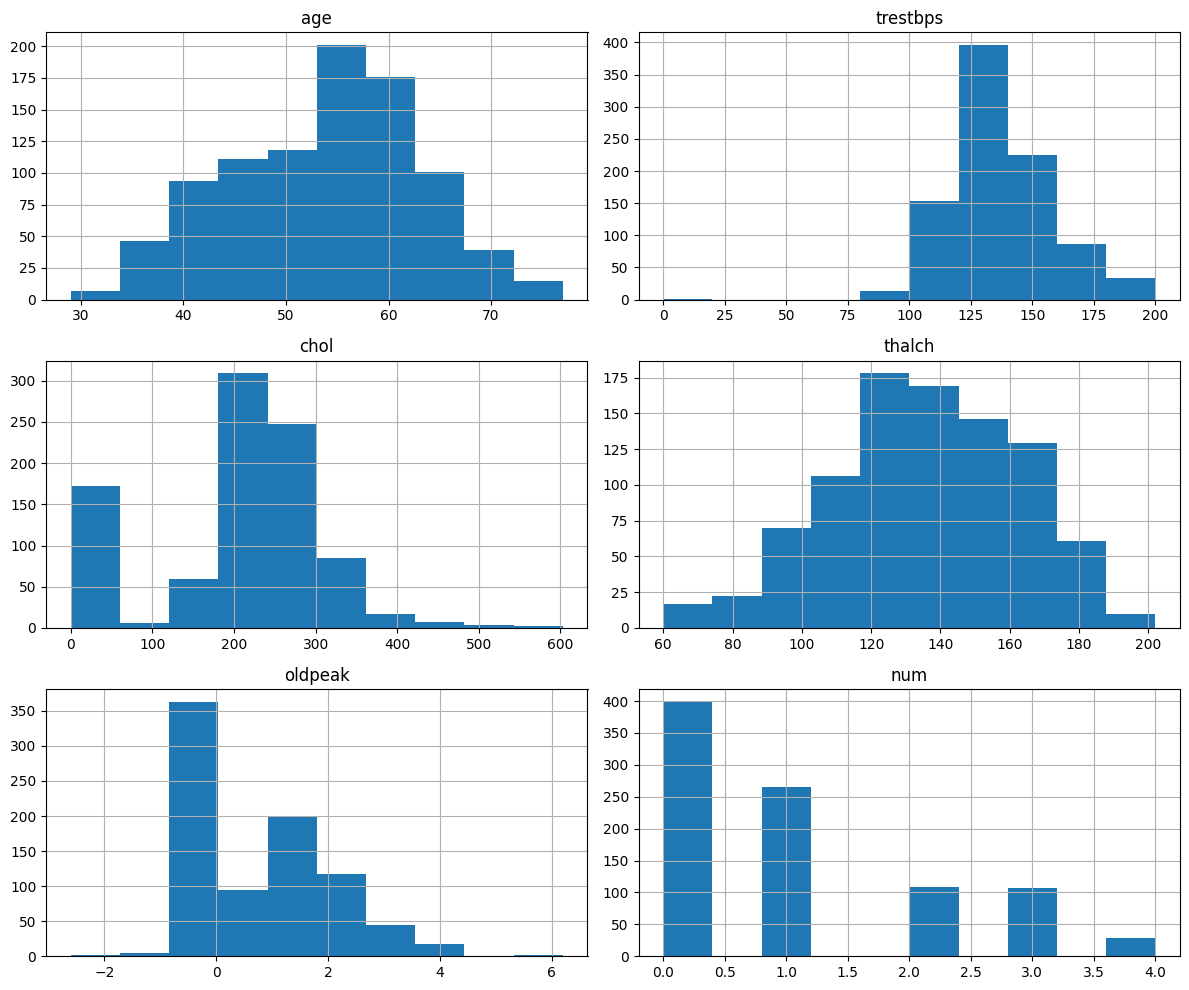

In [3]:

# Visualize the distribution of numerical features
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


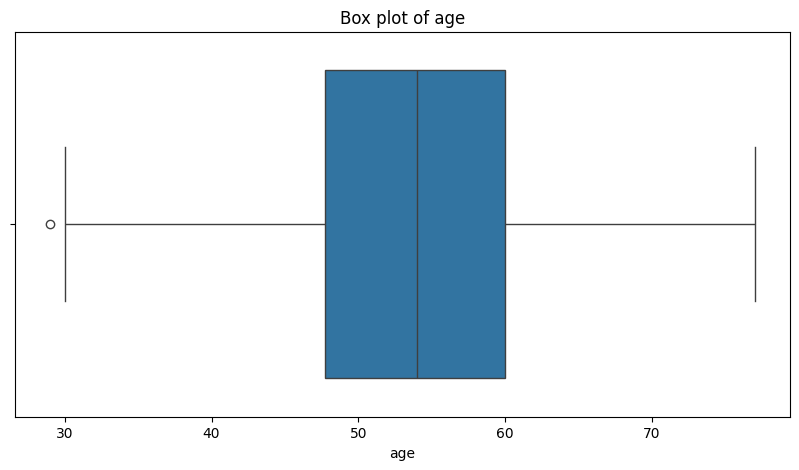

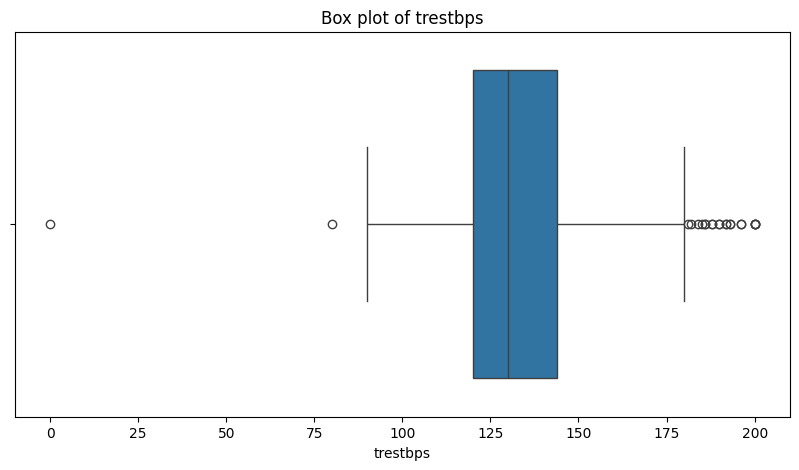

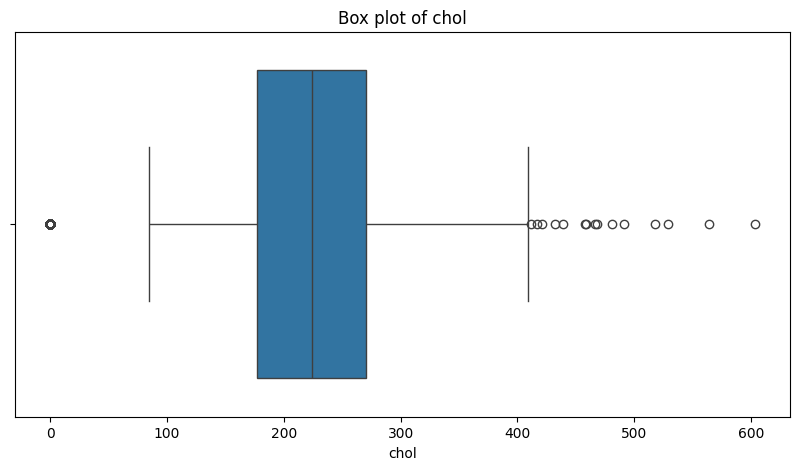

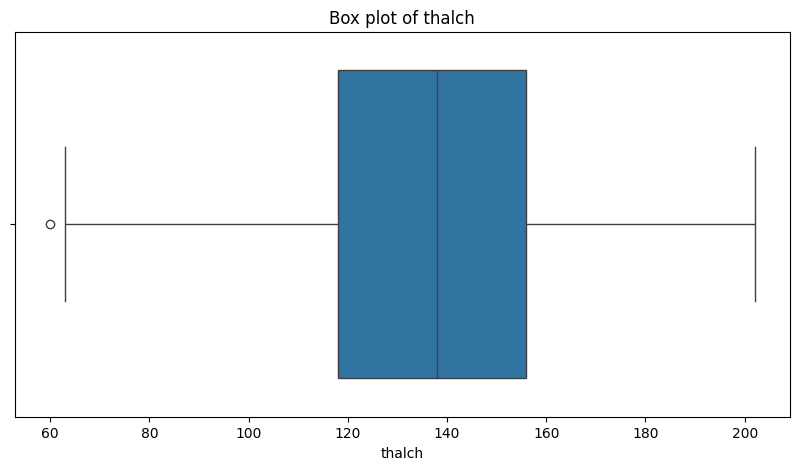

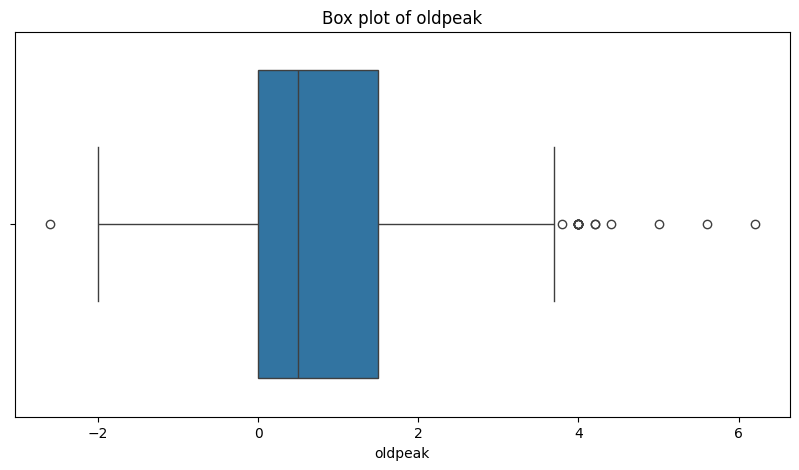

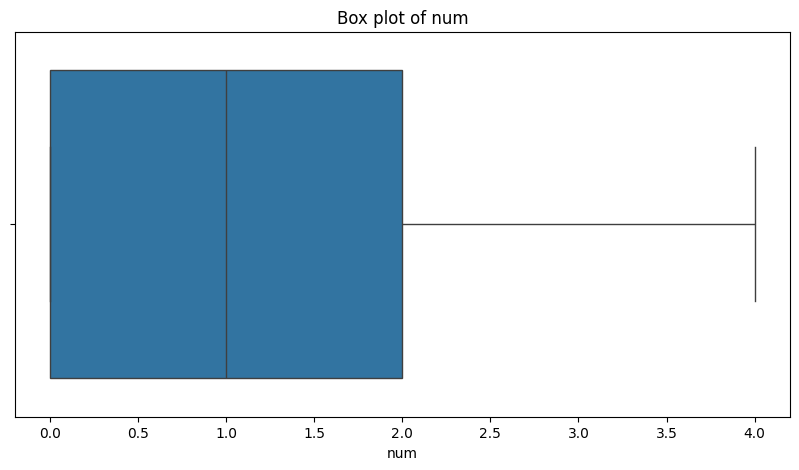

In [4]:
# Box plots to detect outliers
for column in data.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
    plt.show()

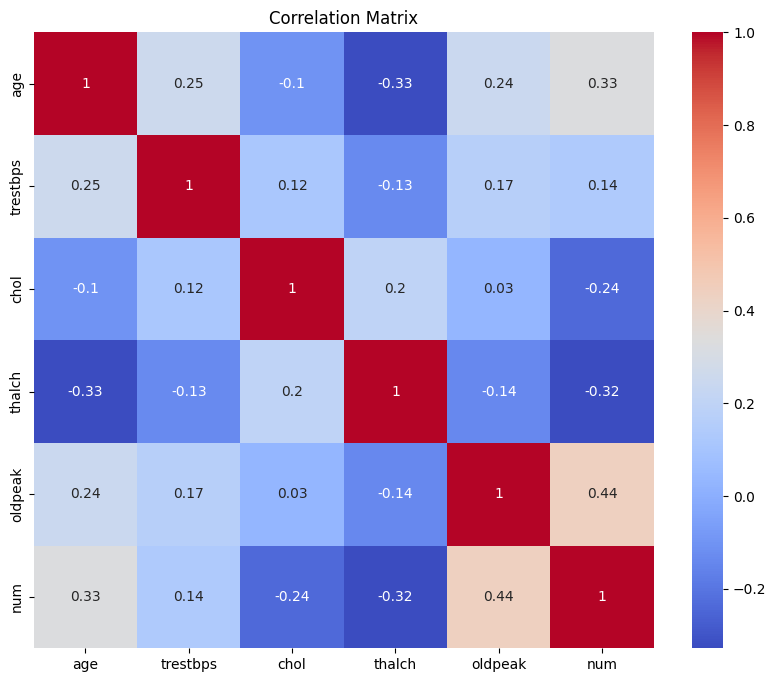

In [6]:
# Correlation matrix
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
# One-hot encode categorical variables
data = pd.get_dummies(data, drop_first=True)

In [13]:
# Feature scaling (if necessary)
from sklearn.preprocessing import StandardScaler

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [19]:
# Load the dataset
data = pd.read_csv('/content/heart_disease.csv')

# Display basic info
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None


In [23]:
# Assuming 'target' is the name of your target variable column
# Replace 'target' with the actual name if different
X = data.drop('num', axis=1)  # Features
y = data['num']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)


In [39]:
# Define the parameters grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
